In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns
import scipy
from scipy.cluster import hierarchy as hc

%matplotlib inline

In [2]:
df=pd.read_csv("Absenteeism_at_work.csv",sep=';')

#3 rows have months to be 0 so I have removed them
df = df[df['Month of absence'] != 0]

#Some rows have values where person is present and they have given the data so for finding the reasons for absent(only) 
#I have created other dataframe df1 for analysis
df1=df[df['Reason for absence']!=0]

#Also remove the duplicate values as some values have similar ID similar date but only hit data different so remove it

df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [ ]:
#df2 = df.groupby(['ID',]).agg({'Absenteeism time in hours': 'mean'})

In [115]:
for i in range(0,2):
    df1=df[df['Social drinker']==i]
    df1 = df1.groupby(['Reason for absence',]).agg({'Absenteeism time in hours': 'mean'})
    print(df1)

                    Absenteeism time in hours
Reason for absence                           
0                                    0.000000
1                                   12.181818
2                                   24.000000
4                                    1.000000
5                                    8.000000
6                                   29.400000
7                                    4.666667
8                                    4.800000
9                                   60.000000
10                                   6.545455
11                                   8.000000
12                                  38.750000
13                                   4.714286
14                                   3.333333
16                                   2.000000
17                                   8.000000
18                                   6.083333
19                                  19.000000
21                                   6.500000
22                                

[Text(0, 0.5, 'Percent')]

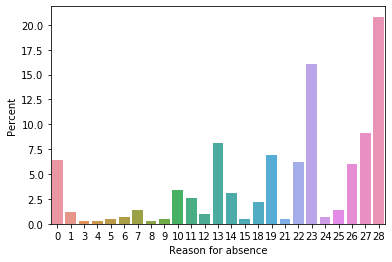

In [116]:
df2 = df[df['Social drinker']==1]
ax = sns.barplot(x=df2['Reason for absence'], y=df2['Reason for absence'], data=df2,
                 estimator=lambda x: len(x) / len(df2) * 100)
ax.set(ylabel="Percent")

[Text(0, 0.5, 'Avg absenteeism time in hours')]

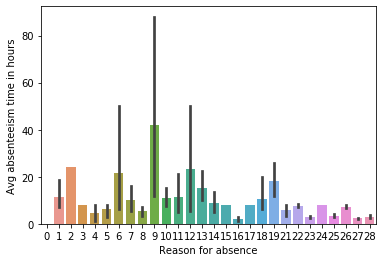

In [117]:
ax = sns.barplot(x=df['Reason for absence'], y=df['Absenteeism time in hours'], data=df)
ax.set(ylabel="Avg absenteeism time in hours")

[Text(0, 0.5, 'Percent')]

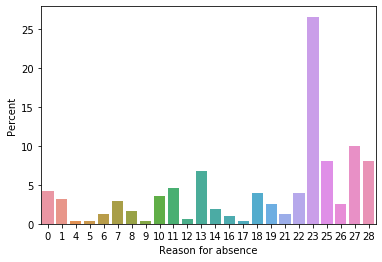

In [10]:
df2 = df[df['Social drinker']==0]
ax = sns.barplot(x=df2['Reason for absence'], y=df2['Reason for absence'], data=df2,
                 estimator=lambda x: len(x) / len(df2) * 100)
ax.set(ylabel="Percent")

In [9]:
for i in range(0,2):
    df1=df[df['Social smoker']==i]
    df1 = df1.groupby(['Reason for absence',]).agg({'Absenteeism time in hours': 'mean'})
    print(df1)

                    Absenteeism time in hours
Reason for absence                           
0                                    0.000000
1                                    7.857143
3                                    8.000000
4                                    4.500000
5                                    6.333333
6                                    7.285714
7                                    5.000000
8                                    5.250000
9                                   12.000000
10                                   7.000000
11                                   5.409091
12                                   5.400000
13                                   6.463415
14                                   4.928571
15                                   8.000000
16                                   3.000000
18                                   7.250000
19                                   8.111111
21                                   4.750000
22                                

[Text(0, 0.5, 'Percent')]

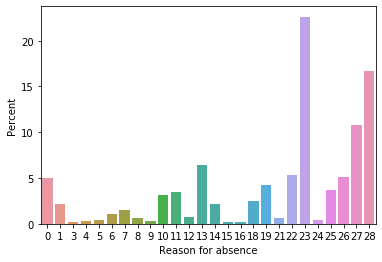

In [15]:
df2 = df[df['Social smoker']==0]
ax = sns.barplot(x=df2['Reason for absence'], y=df2['Reason for absence'], data=df2,
                 estimator=lambda x: len(x) / len(df2) * 100)
ax.set(ylabel="Percent")

[Text(0, 0.5, 'Percent')]

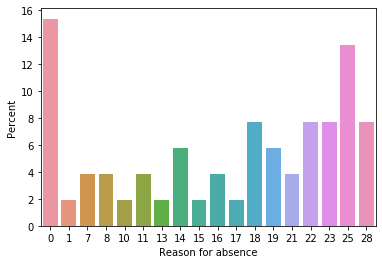

In [16]:
df2 = df[df['Social smoker']==1]
ax = sns.barplot(x=df2['Reason for absence'], y=df2['Reason for absence'], data=df2,
                 estimator=lambda x: len(x) / len(df2) * 100)
ax.set(ylabel="Percent")

In [11]:
for i in range(0,9):
    df1=df[df['Pet']==i]
    df1 = df1.groupby(['Reason for absence',]).agg({'Absenteeism time in hours': 'mean'})
    print(df1)

                    Absenteeism time in hours
Reason for absence                           
0                                    0.000000
1                                    8.454545
4                                    8.000000
5                                    6.333333
6                                    8.000000
7                                    5.333333
8                                    4.800000
9                                   12.000000
10                                   7.117647
11                                   5.111111
12                                   8.500000
13                                   6.310345
14                                   7.500000
15                                   8.000000
16                                   2.000000
17                                   8.000000
18                                   6.900000
19                                   8.166667
21                                   5.400000
22                                

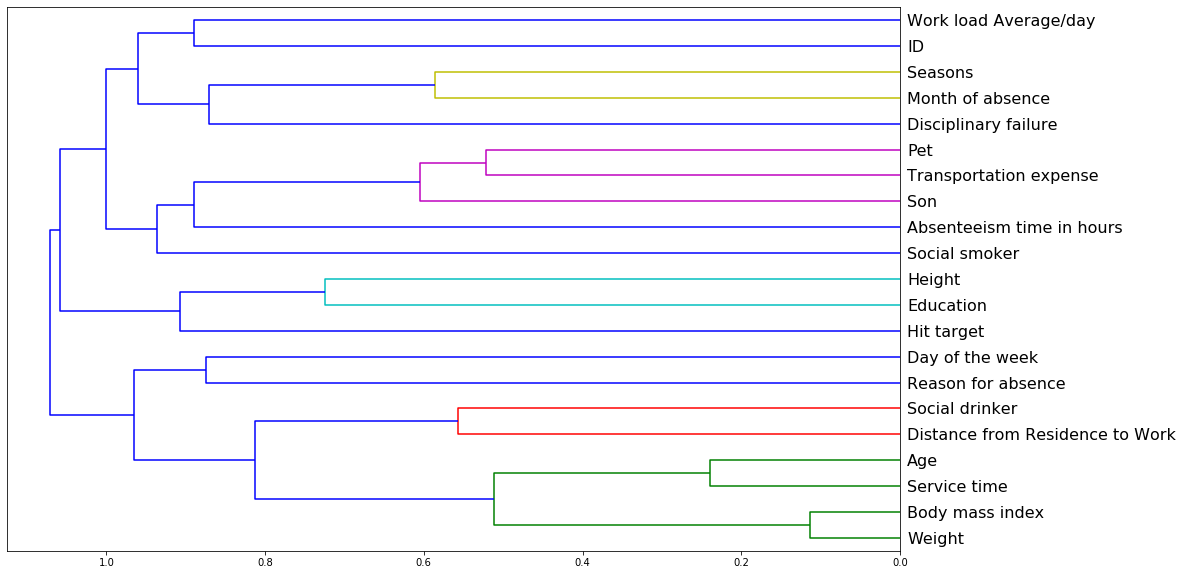

In [89]:
corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size = 16)
plt.show()

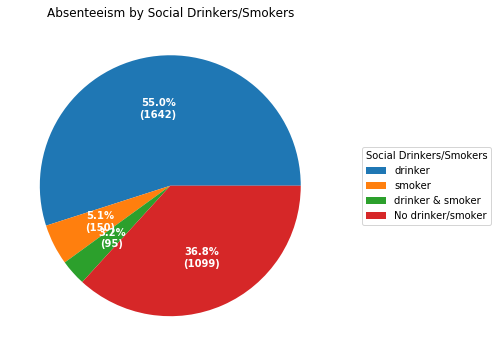

In [27]:
drink_sum = df[(df['Social drinker'] == True) & (df['Social smoker']==False)]['Absenteeism time in hours'].sum()
smok_sum = df[(df['Social drinker'] == False) & (df['Social smoker']==True)]['Absenteeism time in hours'].sum()
drink_smok_sum = df[(df['Social drinker'] == True) & (df['Social smoker']==True)]['Absenteeism time in hours'].sum()
abs_sum = df[(df['Social drinker'] == False) & (df['Social smoker']==False)]['Absenteeism time in hours'].sum()
absen = [drink_sum, smok_sum, drink_smok_sum, abs_sum]
pie_labels = ['drinker', 'smoker', 'drinker & smoker', 'No drinker/smoker']
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(absen, autopct=lambda pct: func(pct, absen), textprops=dict(color='w'))
ax.legend(wedges, pie_labels, title='Social Drinkers/Smokers', loc='right', bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight="bold")
ax.set_title('Absenteeism by Social Drinkers/Smokers')
#plt.pie(absen, labels=pie_labels)
plt.show()

C:\Users\karti\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


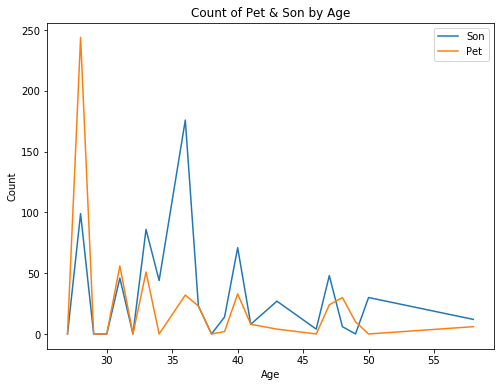

In [26]:
ax = df.groupby('Age')['Son', 'Pet'].sum().plot(figsize=(8,6))
ax.set_ylabel('Count')
ax.set_title('Count of Pet & Son by Age')
plt.show()

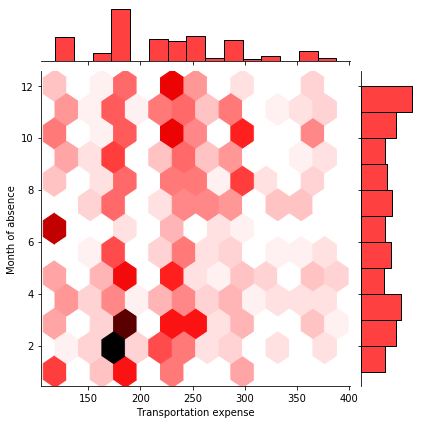

In [25]:
sns.jointplot(x='Transportation expense',y='Month of absence',data=df,kind='hex',color='red')

In [13]:
df1 = df.groupby(['Reason for absence',]).agg({'Absenteeism time in hours': 'mean'})
print(df1)

                    Absenteeism time in hours
Reason for absence                           
0                                    0.000000
1                                    7.866667
3                                    8.000000
4                                    4.500000
5                                    6.333333
6                                    7.285714
7                                    5.166667
8                                    5.333333
9                                   12.000000
10                                   7.047619
11                                   5.708333
12                                   5.400000
13                                   6.333333
14                                   5.588235
15                                   8.000000
16                                   2.000000
17                                   8.000000
18                                   6.850000
19                                   7.766667
21                                

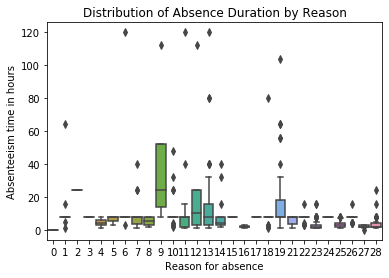

In [93]:
# Boxplot AbsH Reason
plt.title('Distribution of Absence Duration by Reason')
sns.boxplot(data=df, x='Reason for absence', y='Absenteeism time in hours',width=.8)

2.295552367288379
0.1434720229555237
0.1434720229555237
0.2869440459110474
0.430416068866571
1.1477761836441895
2.1520803443328553
0.860832137733142
0.5738880918220948
3.5868005738880915
3.7302725968436152
1.1477761836441895
7.890961262553802
2.72596843615495
0.2869440459110474
0.430416068866571
0.1434720229555237
3.012912482065997
5.738880918220947
0.860832137733142
5.4519368723099
21.37733142037303
0.430416068866571
4.447632711621234
4.734576757532281
9.899569583931134
16.06886657101865


[Text(0, 0.5, 'Percent')]

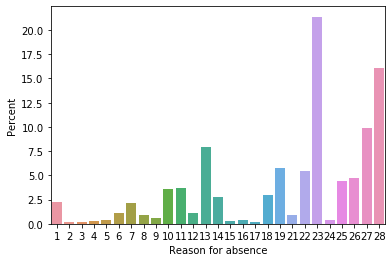

In [90]:
ax = sns.barplot(x=df1['Reason for absence'], y=df1['Reason for absence'], data=df,
                 estimator=lambda x: len(x) / len(df1) * 100)
for i in ax.patches:
    print(i.get_height())
ax.set(ylabel="Percent")

[]

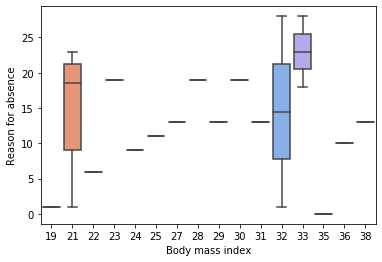

In [118]:
df1=df.groupby(["Body mass index", "Reason for absence","Absenteeism time in hours"]).size().reset_index(name="Yo")
df2 = df1.groupby(['Body mass index']).agg({'Absenteeism time in hours': 'max'})
df3=pd.merge(df1, df2, on=["Body mass index",'Absenteeism time in hours'])
ax = sns.boxplot(x=df3["Body mass index"], y=df3['Reason for absence'], data=df3)
ax.set()

In [119]:
df1=df.groupby(["Work load Average/day ", "Month of absence","Absenteeism time in hours"]).size().reset_index(name="Yo")
df2 = df1.groupby(['Month of absence']).agg({'Absenteeism time in hours': 'mean','Work load Average/day ':'mean'})
print(df2)

                  Absenteeism time in hours  Work load Average/day 
Month of absence                                                   
1                                  7.437500              318.186937
2                                  6.142857              269.874571
3                                 18.476190              274.653238
4                                 14.650000              280.298100
5                                 10.473684              284.912632
6                                 12.700000              302.497550
7                                 19.875000              254.315917
8                                  6.611111              239.564222
9                                  9.333333              268.907857
10                                 7.090909              266.751182
11                                13.500000              287.209545
12                                15.684211              262.914368


In [18]:
df1 = df.groupby(['Work load Average/day ',]).agg({'Absenteeism time in hours': 'mean'})
print(df1)

                        Absenteeism time in hours
Work load Average/day                            
205.917                                  5.000000
222.196                                  3.545455
230.290                                  4.842105
236.629                                  3.631579
237.656                                  4.066667
239.409                                  4.500000
239.554                                  4.944444
241.476                                  2.666667
244.387                                  5.772727
246.074                                  4.687500
246.288                                  4.736842
249.797                                  5.066667
251.818                                  4.100000
253.465                                  4.111111
253.957                                  3.411765
261.306                                  4.384615
261.756                                  3.416667
264.249                                  3.060606


In [19]:
df2 = df.groupby(['Month of absence']).agg({'Hit target': 'mean'})
print(df2)

                  Hit target
Month of absence            
1                  96.333333
2                  97.225352
3                  97.444444
4                  94.489362
5                  97.366667
6                  95.081633
7                  95.064516
8                  92.962264
9                  87.183673
10                 90.357143
11                 94.448276
12                 95.600000


In [11]:
df1 = df[df['Social drinker']==1]
df2 = df1.groupby(['Day of the week']).agg({'Absenteeism time in hours': 'mean'})
print(df2)

                 Absenteeism time in hours
Day of the week                           
2                                 5.466667
3                                 4.088608
4                                 4.922078
5                                 3.910448
6                                 4.232558


In [12]:
df1 = df[df['Social drinker']==0]
df2 = df1.groupby(['Day of the week']).agg({'Absenteeism time in hours': 'mean'})
print(df2)

                 Absenteeism time in hours
Day of the week                           
2                                 4.159420
3                                 4.338462
4                                 3.446154
5                                 4.684211
6                                 3.584906


In [13]:
df1 = df[df['Social smoker']==0]
df2 = df1.groupby(['Day of the week']).agg({'Absenteeism time in hours': 'mean'})
print(df2)

                 Absenteeism time in hours
Day of the week                           
2                                 4.946970
3                                 4.176471
4                                 4.129771
5                                 4.088496
6                                 4.007752


In [14]:
df1 = df[df['Social smoker']==1]
df2 = df1.groupby(['Day of the week']).agg({'Absenteeism time in hours': 'mean'})
print(df2)

                 Absenteeism time in hours
Day of the week                           
2                                 3.666667
3                                 4.625000
4                                 5.636364
5                                 6.090909
6                                 3.700000


In [21]:
df1 = df[df['Day of the week']==2]
df2 = df1.groupby(['Distance from Residence to Work']).agg({'Transportation expense': 'mean'})
print(df2)

                                 Transportation expense
Distance from Residence to Work                        
5                                            279.000000
10                                           118.000000
11                                           243.250000
12                                           155.000000
13                                           118.000000
14                                           228.000000
15                                           388.000000
16                                           266.666667
17                                           369.000000
20                                           235.000000
22                                           179.000000
25                                           247.272727
26                                           211.047619
27                                           157.000000
29                                           215.285714
31                                           291

In [22]:
df1 = df[df['Day of the week']==3]
df2 = df1.groupby(['Distance from Residence to Work']).agg({'Transportation expense': 'mean'})
print(df2)

                                 Transportation expense
Distance from Residence to Work                        
5                                            279.000000
10                                           118.000000
11                                           235.000000
12                                           155.000000
13                                           118.000000
14                                           228.000000
15                                           388.000000
16                                           314.166667
17                                           369.000000
20                                           235.000000
22                                           179.000000
25                                           246.500000
26                                           216.238095
27                                           157.000000
29                                           189.000000
31                                           291

In [23]:
df1 = df[df['Day of the week']==4]
df2 = df1.groupby(['Distance from Residence to Work']).agg({'Transportation expense': 'mean'})
print(df2)

                                 Transportation expense
Distance from Residence to Work                        
5                                                279.00
10                                               118.00
11                                               235.00
12                                               155.00
13                                               118.00
14                                               228.00
15                                               212.25
16                                               306.25
17                                               369.00
20                                               235.00
22                                               179.00
25                                               247.50
26                                               211.20
27                                               157.00
31                                               291.00
36                                              

In [24]:
df1 = df[df['Day of the week']==5]
df2 = df1.groupby(['Distance from Residence to Work']).agg({'Transportation expense': 'mean'})
print(df2)

                                 Transportation expense
Distance from Residence to Work                        
5                                            279.000000
10                                           118.000000
11                                           239.714286
12                                           155.000000
13                                           118.000000
15                                           225.000000
16                                           282.500000
17                                           369.000000
20                                           235.000000
22                                           179.000000
25                                           246.800000
26                                           212.285714
29                                           198.200000
31                                           291.000000
36                                           289.000000
42                                           184

In [25]:
df1 = df[df['Day of the week']==6]
df2 = df1.groupby(['Distance from Residence to Work']).agg({'Transportation expense': 'mean'})
print(df2)

                                 Transportation expense
Distance from Residence to Work                        
10                                           118.000000
11                                           235.000000
12                                           155.000000
13                                           118.000000
15                                           225.000000
16                                           292.000000
17                                           369.000000
20                                           235.000000
22                                           179.000000
25                                           246.857143
26                                           205.125000
27                                           157.000000
29                                           235.000000
31                                           291.000000
36                                           289.000000
42                                           184

In [20]:
df2 = df.groupby(['Day of the week']).agg({'Absenteeism time in hours': 'mean'})
print(df2)

                 Absenteeism time in hours
Day of the week                           
2                                 4.840278
3                                 4.201389
4                                 4.246479
5                                 4.266129
6                                 3.985612


In [21]:
df1=df[df['Son'] == 0]
df2 = df1.groupby(['Day of the week']).agg({'Absenteeism time in hours': 'mean'})
print(df2)

                 Absenteeism time in hours
Day of the week                           
2                                 4.390625
3                                 3.627119
4                                 3.949153
5                                 4.391304
6                                 3.625000


In [22]:
df1=df[df['Son'] == 1]
df2 = df1.groupby(['Day of the week']).agg({'Absenteeism time in hours': 'mean'})
print(df2)

                 Absenteeism time in hours
Day of the week                           
2                                 4.756098
3                                 3.770833
4                                 4.063830
5                                 2.836735
6                                 3.843750


In [23]:
df1=df[df['Son'] == 2]
df2 = df1.groupby(['Day of the week']).agg({'Absenteeism time in hours': 'mean'})
print(df2)

                 Absenteeism time in hours
Day of the week                           
2                                 5.400000
3                                 5.566667
4                                 4.793103
5                                 6.307692
6                                 4.375000


In [24]:
df1=df[df['Son'] == 3]
df2 = df1.groupby(['Day of the week']).agg({'Absenteeism time in hours': 'mean'})
print(df2)

                 Absenteeism time in hours
Day of the week                           
2                                 6.666667
3                                 6.750000
4                                 2.666667
5                                 8.000000
6                                 8.000000


In [25]:
df1=df[df['Son'] == 4]
df2 = df1.groupby(['Day of the week']).agg({'Absenteeism time in hours': 'mean'})
print(df2)

                 Absenteeism time in hours
Day of the week                           
2                                 6.500000
3                                 5.333333
4                                 8.000000
5                                 8.000000
6                                 4.280000


In [26]:
df1=df[df['Son'] == 0]
df2 = df1.groupby(['Month of absence']).agg({'Absenteeism time in hours': 'mean'})
print(df2)

                  Absenteeism time in hours
Month of absence                           
1                                  2.920000
2                                  3.909091
3                                  3.909091
4                                  4.214286
5                                  3.000000
6                                  3.703704
7                                  5.080000
8                                  4.833333
9                                  4.142857
10                                 4.238095
11                                 4.450000
12                                 3.928571


In [27]:
df1=df[df['Son'] == 1]
df2 = df1.groupby(['Month of absence']).agg({'Absenteeism time in hours': 'mean'})
print(df2)

                  Absenteeism time in hours
Month of absence                           
1                                  3.181818
2                                  2.642857
3                                  5.150000
4                                  3.529412
5                                  5.235294
6                                  5.117647
7                                  5.062500
8                                  5.000000
9                                  2.937500
10                                 2.206897
11                                 2.761905
12                                 3.875000


In [28]:
df1=df[df['Son'] == 2]
df2 = df1.groupby(['Month of absence']).agg({'Absenteeism time in hours': 'mean'})
print(df2)

                  Absenteeism time in hours
Month of absence                           
1                                  4.833333
2                                  5.090909
3                                  6.650000
4                                  6.333333
5                                  3.894737
6                                  7.000000
7                                  7.285714
8                                  4.437500
9                                  1.000000
10                                 6.700000
11                                 4.583333
12                                 3.666667


In [29]:
df1=df[df['Son'] == 3]
df2 = df1.groupby(['Month of absence']).agg({'Absenteeism time in hours': 'mean'})
print(df2)

                  Absenteeism time in hours
Month of absence                           
3                                  4.000000
4                                  4.000000
5                                  8.000000
9                                  4.000000
10                                 7.166667
11                                 8.000000


In [30]:
df1=df[df['Son'] == 4]
df2 = df1.groupby(['Month of absence']).agg({'Absenteeism time in hours': 'mean'})
print(df2)

                  Absenteeism time in hours
Month of absence                           
2                                  2.500000
3                                  8.000000
4                                  3.666667
5                                  3.000000
6                                  4.000000
7                                  5.714286
8                                  3.750000
9                                  4.000000
10                                 5.500000
11                                 5.750000
12                                 5.750000


In [31]:
df1=df[df['Son'] == 0]
df2 = df1.groupby(['Seasons']).agg({'Absenteeism time in hours': 'mean'})
print(df2)

         Absenteeism time in hours
Seasons                           
1                         4.471429
2                         3.770833
3                         3.580645
4                         4.214286


In [32]:
df1=df[df['Son'] == 1]
df2 = df1.groupby(['Seasons']).agg({'Absenteeism time in hours': 'mean'})
print(df2)

         Absenteeism time in hours
Seasons                           
1                         4.613636
2                         3.710526
3                         4.709091
4                         2.825000


In [33]:
df1=df[df['Son'] == 2]
df2 = df1.groupby(['Seasons']).agg({'Absenteeism time in hours': 'mean'})
print(df2)

         Absenteeism time in hours
Seasons                           
1                         5.235294
2                         5.500000
3                         5.461538
4                         4.846154


In [34]:
df1=df[df['Son'] == 3]
df2 = df1.groupby(['Seasons']).agg({'Absenteeism time in hours': 'mean'})
print(df2)

         Absenteeism time in hours
Seasons                           
2                         0.000000
3                         6.666667
4                         6.555556


In [13]:
df1=df[df['Son'] == 4]
df2 = df1.groupby(['Seasons']).agg({'Absenteeism time in hours': 'mean'})
print(df2)

         Absenteeism time in hours
Seasons                           
1                         5.153846
2                         6.625000
3                         4.333333
4                         4.923077


In [8]:
df2 = df.groupby(['Seasons']).agg({'Absenteeism time in hours': 'mean'})
print(df2)

         Absenteeism time in hours
Seasons                           
1                         4.726708
2                         4.240437
3                         4.484848
4                         3.864130


In [33]:
df2 = df.groupby(['Distance from Residence to Work']).agg({'Transportation expense': 'mean'})
print(df2)

                                 Transportation expense
Distance from Residence to Work                        
5                                            279.000000
10                                           118.000000
11                                           238.807692
12                                           155.000000
13                                           118.000000
14                                           228.000000
15                                           255.555556
16                                           292.000000
17                                           369.000000
20                                           235.000000
22                                           179.000000
25                                           246.960000
26                                           211.096774
27                                           157.000000
29                                           208.714286
31                                           291

                        Absenteeism time in hours
Transportation expense                           
118                                      3.226190
155                                      4.909091
157                                      4.428571
179                                      3.656977
184                                      3.857143
189                                      9.000000
225                                      3.200000
228                                      5.000000
231                                      0.000000
233                                      4.857143
235                                      5.034483
246                                      5.769231
248                                      3.041667
260                                      5.250000
268                                      5.333333
279                                      5.000000
289                                      6.450000
291                                      2.972222


[]

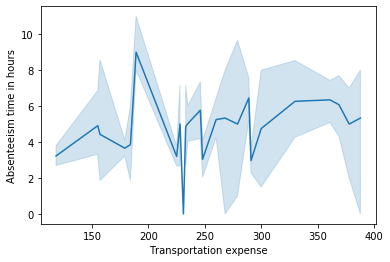

In [7]:
df2 = df.groupby(['Transportation expense']).agg({'Absenteeism time in hours': 'mean'})
print(df2)
ax = sns.lineplot(x=df["Transportation expense"], y=df['Absenteeism time in hours'], data=df)
ax.set()

[]

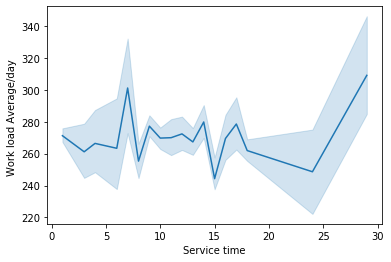

In [37]:
ax = sns.lineplot(x=df["Service time"], y=df['Work load Average/day '], data=df)
ax.set()

[]

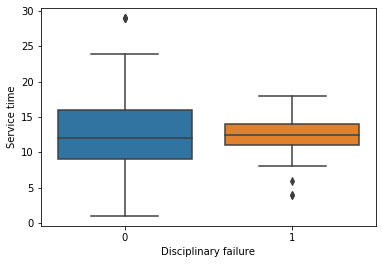

In [40]:
ax = sns.boxplot(x=df["Disciplinary failure"], y=df['Service time'], data=df)
ax.set()

[]

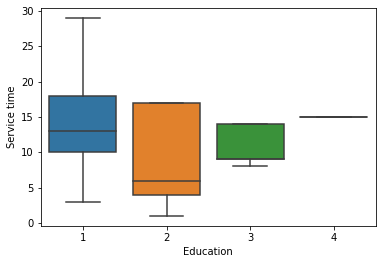

In [41]:
ax = sns.boxplot(x=df["Education"], y=df['Service time'], data=df)
ax.set()

[]

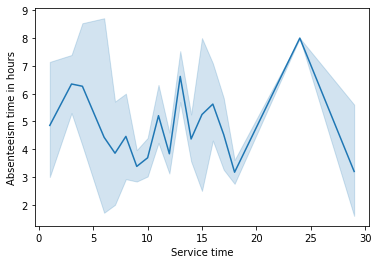

In [43]:
df2 = df.groupby(['Service time']).agg({'Absenteeism time in hours': 'mean'})
ax = sns.lineplot(x=df["Service time"], y=df['Absenteeism time in hours'], data=df)
ax.set()

[]

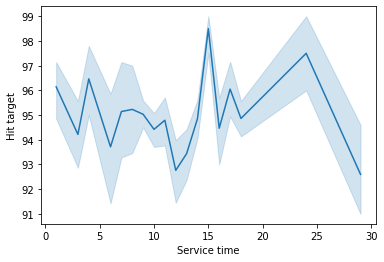

In [44]:
df2 = df.groupby(['Service time']).agg({'Hit target': 'mean'})
ax = sns.lineplot(x=df["Service time"], y=df['Hit target'], data=df)
ax.set()

[]

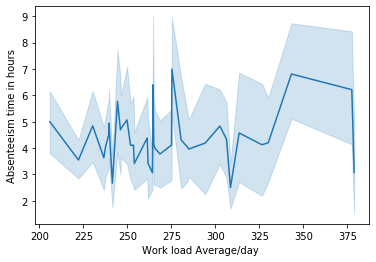

In [45]:
df2 = df.groupby(['Work load Average/day ']).agg({'Absenteeism time in hours': 'mean'})
ax = sns.lineplot(x=df["Work load Average/day "], y=df['Absenteeism time in hours'], data=df)
ax.set()

[]

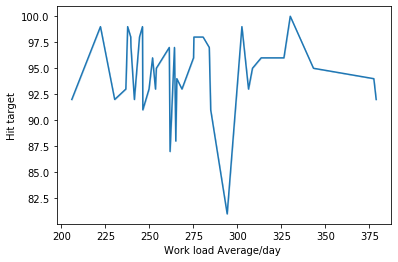

In [46]:
df2 = df.groupby(['Work load Average/day ']).agg({'Hit target': 'mean'})
ax = sns.lineplot(x=df["Work load Average/day "], y=df['Hit target'], data=df)
ax.set()

[]

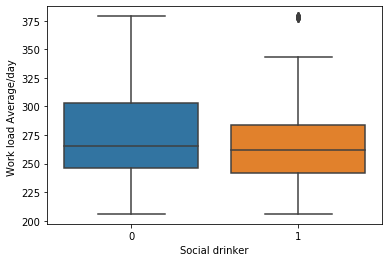

In [47]:
ax = sns.boxplot(x=df["Social drinker"], y=df['Work load Average/day '], data=df)
ax.set()

[]

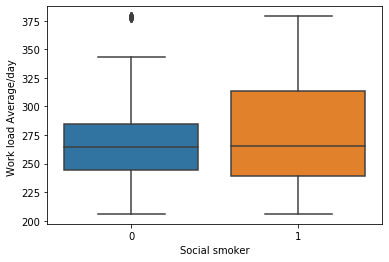

In [48]:
ax = sns.boxplot(x=df["Social smoker"], y=df['Work load Average/day '], data=df)
ax.set()

In [53]:
df2 = df.groupby(['Education']).agg({'Disciplinary failure': 'mean'})
print(df2)

           Disciplinary failure
Education                      
1                      0.063380
2                      0.068182
3                      0.012987
4                      0.000000


In [112]:
df2 = df.groupby(['Social drinker']).agg({'Disciplinary failure': 'mean'})
print(df2)

                Disciplinary failure
Social drinker                      
0                           0.040752
1                           0.064593


In [113]:
df2 = df.groupby(['Social smoker']).agg({'Disciplinary failure': 'mean'})
print(df2)

               Disciplinary failure
Social smoker                      
0                          0.046852
1                          0.148148


           Absenteeism time in hours
Education                           
1                           7.225329
2                           6.391304
3                           5.265823
4                           5.250000


[]

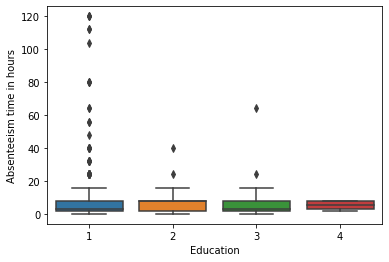

In [114]:
df2 = df.groupby(['Education']).agg({'Absenteeism time in hours': 'mean'})
print(df2)
ax = sns.boxplot(x=df["Education"], y=df['Absenteeism time in hours'], data=df)
ax.set()

[]

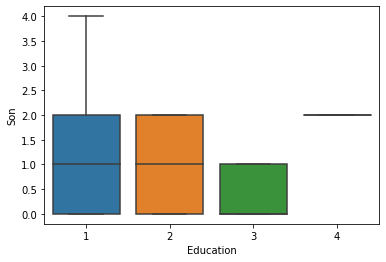

In [58]:
ax = sns.boxplot(x=df["Education"], y=df['Son'], data=df)
ax.set()

[Text(0, 0.5, 'Percent')]

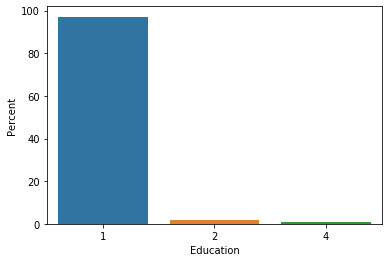

In [41]:
df1=df[df['Social drinker']==1]
ax = sns.barplot(x=df1['Education'], y=df1['Education'], data=df1,
                 estimator=lambda x: len(x) / len(df1) * 100)
ax.set(ylabel="Percent")

[Text(0, 0.5, 'Percent')]

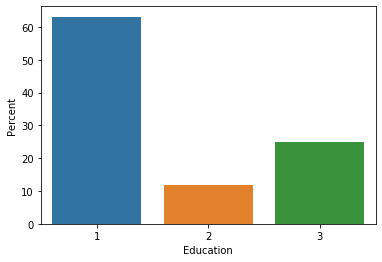

In [62]:
df1=df[df['Social drinker']==0]
ax = sns.barplot(x=df1['Education'], y=df1['Education'], data=df1,
                 estimator=lambda x: len(x) / len(df1) * 100)
ax.set(ylabel="Percent")

[Text(0, 0.5, 'Percent')]

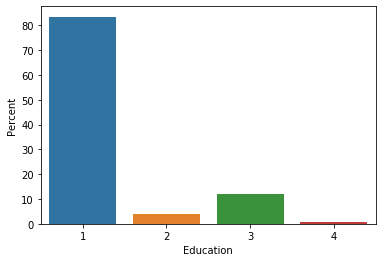

In [63]:
df1=df[df['Social smoker']==0]
ax = sns.barplot(x=df1['Education'], y=df1['Education'], data=df1,
                 estimator=lambda x: len(x) / len(df1) * 100)
ax.set(ylabel="Percent")

[Text(0, 0.5, 'Percent')]

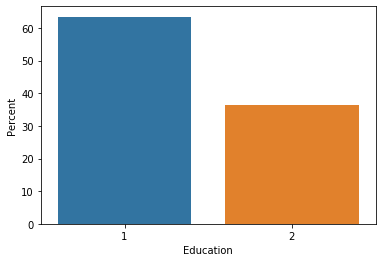

In [39]:
df1=df[df['Social smoker']==1]
ax = sns.barplot(x=df1['Education'], y=df1['Education'], data=df1, estimator=lambda x: len(x) / len(df1) * 100)
ax.set(ylabel="Percent")

[]

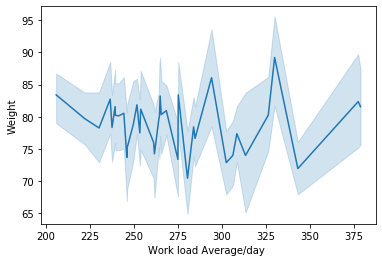

In [67]:
df2 = df.groupby(['Work load Average/day ']).agg({'Weight': 'mean'})
ax = sns.lineplot(x=df["Work load Average/day "], y=df['Weight'], data=df)
ax.set()

In [88]:
df2 = df.groupby(['Social drinker']).agg({'Weight': 'mean'})
print(df2)

                   Weight
Social drinker           
0               73.438871
1               83.215311


In [37]:
df2 = df.groupby(['Social smoker']).agg({'Weight': 'mean'})
print(df2)

                  Weight
Social smoker           
0              79.591264
1              69.923077


In [111]:
df2 = df.groupby(['Social drinker']).agg({'Absenteeism time in hours': 'mean'})
print(df2)

                Absenteeism time in hours
Social drinker                           
0                                5.949843
1                                7.717703


In [110]:
df2 = df.groupby(['Social smoker']).agg({'Absenteeism time in hours': 'mean'})
print(df2)

               Absenteeism time in hours
Social smoker                           
0                               6.988287
1                               6.500000


In [70]:
df1=df[df['Education']==4]
df2=df1[df1['Son']==2]
print(len(df2))

4


In [109]:
df2 = df.groupby(['Son']).agg({'Absenteeism time in hours': 'mean'})
print(df2)

     Absenteeism time in hours
Son                           
0                     5.385906
1                     6.083700
2                    10.638710
3                    12.200000
4                     7.285714


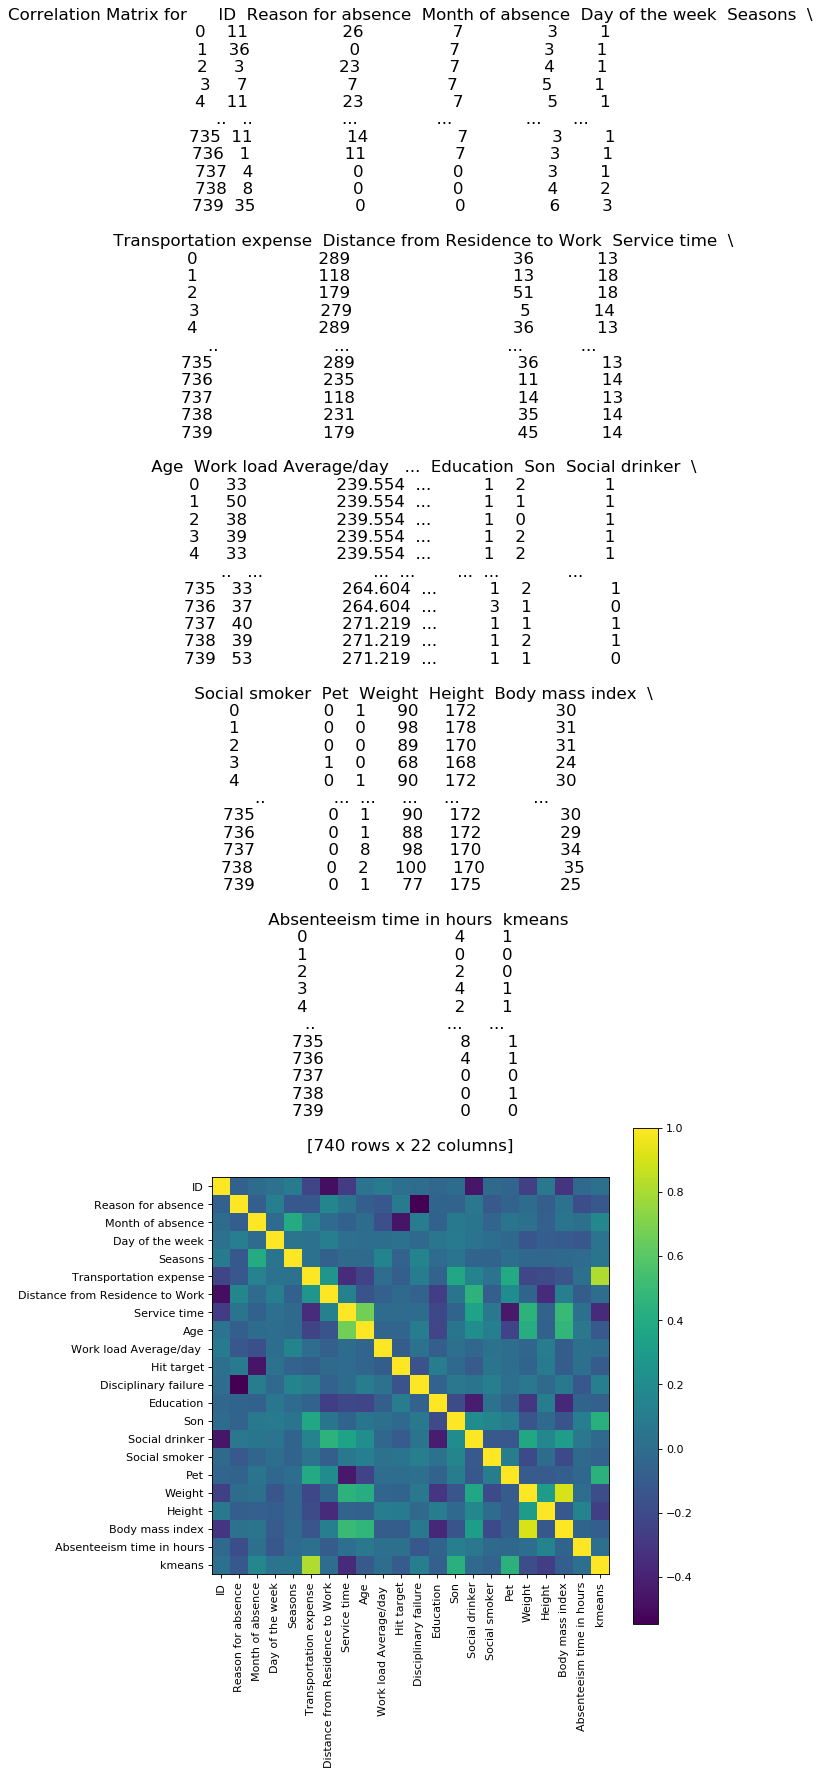

In [10]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
plotCorrelationMatrix(df, 8)

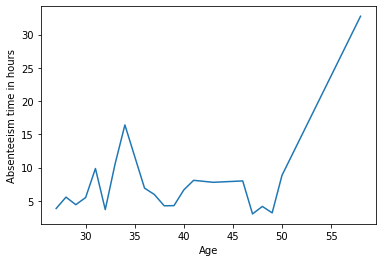

In [108]:
df2=df.groupby('Age').mean().reset_index()
sns.lineplot(x=df2['Age'], y=df2['Absenteeism time in hours'], data=df)

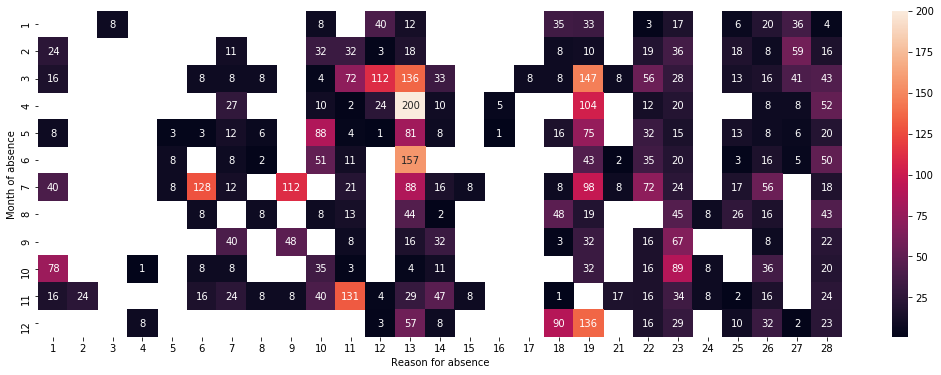

In [107]:
plt.figure(figsize = (18, 6))
sns.heatmap(df[df['Reason for absence'] != 0].groupby(['Month of absence', 'Reason for absence'])['Absenteeism time in hours'].sum().unstack(), 
             annot = True, fmt = 'g')
plt.show() 


In [106]:
roa = df.groupby('Reason for absence')
roa['Absenteeism time in hours'].mean()

Reason for absence
0      0.000000
1     11.375000
2     24.000000
3      8.000000
4      4.500000
5      6.333333
6     21.375000
7     10.000000
8      5.333333
9     42.000000
10    11.040000
11    11.423077
12    23.375000
13    15.309091
14     8.789474
15     8.000000
16     2.000000
17     8.000000
18    10.333333
19    18.225000
21     5.833333
22     7.710526
23     2.845638
24     8.000000
25     3.483871
26     7.272727
27     2.275362
28     2.991071
Name: Absenteeism time in hours, dtype: float64

In [97]:
bins = [20,30, 40, 50, 60]
df['binned'] = pd.cut(df['Age'], bins)
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,binned
0,11,26,7,3,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,4,"(30, 40]"
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,0,0,98,178,31,0,"(40, 50]"
2,3,23,7,4,1,179,51,18,38,239.554,...,1,0,1,0,0,89,170,31,2,"(30, 40]"
3,7,7,7,5,1,279,5,14,39,239.554,...,1,2,1,1,0,68,168,24,4,"(30, 40]"
4,11,23,7,5,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,2,"(30, 40]"


[Text(0.5, 0, 'Age')]

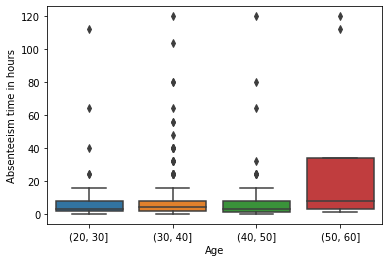

In [98]:
ax = sns.boxplot(x=df['binned'], y=df['Absenteeism time in hours'], data=df)
ax.set(xlabel='Age')

In [99]:
bins = [15,18,25,30,40]
df['binned2'] = pd.cut(df['Body mass index'], bins)
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,binned,binned2
0,11,26,7,3,1,289,36,13,33,239.554,...,2,1,0,1,90,172,30,4,"(30, 40]","(25, 30]"
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,0,0,98,178,31,0,"(40, 50]","(30, 40]"
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,0,89,170,31,2,"(30, 40]","(30, 40]"
3,7,7,7,5,1,279,5,14,39,239.554,...,2,1,1,0,68,168,24,4,"(30, 40]","(18, 25]"
4,11,23,7,5,1,289,36,13,33,239.554,...,2,1,0,1,90,172,30,2,"(30, 40]","(25, 30]"


[Text(0.5, 0, 'BMI')]

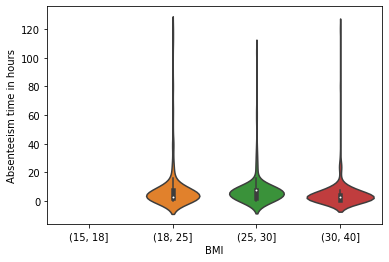

In [105]:
ax = sns.violinplot(x=df['binned2'], y=df['Absenteeism time in hours'], data=df)
ax.set(xlabel='BMI')

In [94]:
df2 = df.groupby(['Month of absence']).agg({'Absenteeism time in hours': 'mean'})
print(df2)


                  Absenteeism time in hours
Month of absence                           
1                                  4.440000
2                                  4.083333
3                                  8.793103
4                                  9.094340
5                                  6.250000
6                                  7.611111
7                                 10.955224
8                                  5.333333
9                                  5.509434
10                                 4.915493
11                                 7.507937
12                                 8.448980


In [95]:
df2 = df.groupby(['Day of the week']).agg({'Absenteeism time in hours': 'mean'})
print(df2)

                 Absenteeism time in hours
Day of the week                           
2                                 9.248447
3                                 8.032680
4                                 7.193548
5                                 4.424000
6                                 5.160839


In [96]:
df2 = df.groupby(['Seasons']).agg({'Absenteeism time in hours': 'mean'})
print(df2)

         Absenteeism time in hours
Seasons                           
1                         7.343195
2                         6.031414
3                         8.197802
4                         6.353846


In [6]:
df1=df[df['Social drinker']==0]
df2=df1[df1['Social smoker']==0]
print(len(df2))

285
